# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle as pkl
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.tree import DecisionTreeClassifier
import json
import sys
import requests
import warnings
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

In [2]:
with open('data/modeling_data.pkl', 'rb') as f:
    df = pkl.load(f)

In [3]:
df.head()

,delayed_2,date,rush_hour,weekend,major_conditions,minor_conditions,neutral_conditions,clear_conditions,mon,tue,wed,th,fri,sat,sun,max_temp,avg_temp,min_temp,avg_wind_spd,prcp,snowfall,snowfall_depth,fastest_wind_spd,fastest_wind_directions,bronx,brooklyn,manhattan,queens,causes_conditions,causes_passenger,causes_station,causes_train,direction_both,direction_manhattan,direction_northbound,direction_southbound,103 st (1),103 st (6),103 st (7),110 st (1),110 st (6),110 st-cathedral pkwy (1),111 st (7),116 st (2/3),116 st-columbia (1),125 st (1),125 st (1/2/3),125 st (4/5/6),135 st (2/3),137 st (1),138 st-grand concourse (4/5),14 st-7 av (1/2/3),14 st-union sq (4/5/6),145 st (1),149 st-grand concourse (2/4/5),157 st (1),161 st-yankee (4),167 st (4),168 st (1),170 st (4),174 st (2/5),176 st (4),18 st (1),181 st (1),183 st (4),207 st (1),215 st (1),219 st (2/5),225 st (2/5),23 st (1),23 st (6),233 st (2/5),238 st (1),28 st (1),28 st (6),3 av-138 st (6),3 av-149 st (2/5),33 st-rawson st (7),34 st-hudson yds (7),34 st-penn st (1/2/3),40 st (7),42 st-grand central (4/5/6/7/S),42 st-times sq (1/2/3/7/S),46 st (7),5 av (7),50 st (1),51 st (6),52 st (7),59 st (6),61 st (7),66 st-lincoln ctr (1),68 st-hunter clg (6),69 st (7),72 st (1/2/3),74 st (7),77 st (6),79 st (1),82 st (7),86 st (1),86 st (4/5/6),90 st (7),96 st (1/2/3),96 st (6),Harlem-148 st (3),allerton av (2/5),astor pl (6),atlantic av-barclays ctr (2/3/4/5),baychester av (5),bedford pk (4),bergen st (2/3),beverly rd (2/5),bleeker st (6),borough hall (2/3/4/5),bowling green (4/5),bronx park east (2/5),brook av (6),brooklyn bridge-city hall (4/5/6),buhre av (6),burke av (2/5),burnside av (4),canal st (1),canal st (6),castle hill av (6),central park n-110 st (2/3),chambers st (1/2/3),christopher st (1),church av (2/5),clark st (2/3),court sq (7),crown hts-utica av (3/4),cypress av (6),dyckman st (1),e 143 st (6),e 149 st (6),e 180 st (2/5),eastchester dyre av (5),eastern pkwy (2/3),elder av (6),flatbush av-bk clg (2/5),flushing main st (7),fordham rd (4),franklin av-medgar evers clg (2/3/4/5),franklin st (1),freeman st (2/5),fulton st (2/3),fulton st (4/5),grand army plza (2/3),gun hill rd (2/5),gun hill rd (5),houston st (1),hoyt st (2/3),hunters pt (7),hunts pt (6),intervale av (2/5),jackson av (2/5),junction blvd (7),junius st (3),kingsbridge rd (4),kingston av (3),longwood av (6),mets willis pt (7),middletown rd (6),morris pk (5),moshulu pkwy (4),mt eden av (4),nereid av (2/5),nevins st (2/3/4/5),new lots av (3),newkirk av (2/5),nostrand av (3),park pl (2/3),parkchester (6),pelham bay pk (6),pelham pkwy (2/5),pennsylvania av (3),president st-medgar evers clg (2/5),prospect av (2/5),qnsboro plza (7),rector st (1),rockaway av (3),saratoga av (3),simpson st (2/5),spring st (6),st lawrence av (6),sterling st (2/5),sutter av (3),van cortlandt park (1),van siclen av (3),vernon blvd (7),wakefield-241 st (2/5),wall st (2/3),wall st (4/5),west farm sq (2/5),westchester sq-e tremont av (6),whitlock av (6),winthrop st (2/5),woodlawn (4),wtc cortlandt (1),zerega av (6)
0,1,2021-09-30 21:34:00,0,0,0,0,0,1,0,0,0,1,0,0,0,66.0,62.0,54.5,9.955,0.0,0.0,0.0,26.95,"nw, n",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2021-09-30 21:28:00,0,0,0,0,0,1,0,0,0,1,0,0,0,66.0,62.0,54.5,9.955,0.0,0.0,0.0,26.95,"nw, n",1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2021-09-30 19:14:00,0,0,0,0,0,1,0,0,0,1

In [4]:
list(df.columns)

['delayed_2',
 'date',
 'rush_hour',
 'weekend',
 'major_conditions',
 'minor_conditions',
 'neutral_conditions',
 'clear_conditions',
 'mon',
 'tue',
 'wed',
 'th',
 'fri',
 'sat',
 'sun',
 'max_temp',
 'avg_temp',
 'min_temp',
 'avg_wind_spd',
 'prcp',
 'snowfall',
 'snowfall_depth',
 'fastest_wind_spd',
 'fastest_wind_directions',
 'bronx',
 'brooklyn',
 'manhattan',
 'queens',
 'causes_conditions',
 'causes_passenger',
 'causes_station',
 'causes_train',
 'direction_both',
 'direction_manhattan',
 'direction_northbound',
 'direction_southbound',
 '103 st (1)',
 '103 st (6)',
 '103 st (7)',
 '110 st (1)',
 '110 st (6)',
 '110 st-cathedral pkwy (1)',
 '111 st (7)',
 '116 st (2/3)',
 '116 st-columbia (1)',
 '125 st (1)',
 '125 st (1/2/3)',
 '125 st (4/5/6)',
 '135 st (2/3)',
 '137 st (1)',
 '138 st-grand concourse (4/5)',
 '14 st-7 av (1/2/3)',
 '14 st-union sq (4/5/6)',
 '145 st (1)',
 '149 st-grand concourse (2/4/5)',
 '157 st (1)',
 '161 st-yankee (4)',
 '167 st (4)',
 '168 st (1)'

## Looking at different feature correlation

In [5]:
features_df = df[['delayed_2', 'rush_hour', 'weekend', 'major_conditions', 'minor_conditions', 'neutral_conditions',
                 'clear_conditions', 'mon', 'tue', 'wed', 'th', 'fri', 'sat', 'sun', 'max_temp', 'avg_temp', 'min_temp',
                 'avg_wind_spd', 'prcp', 'snowfall', 'snowfall_depth', 'fastest_wind_spd', 'bronx', 'brooklyn', 'manhattan',
                  'queens', 'causes_conditions', 'causes_passenger', 'causes_station', 'causes_train', 'direction_both',
                  'direction_manhattan', 'direction_northbound', 'direction_southbound',]]

In [6]:
stations_df = df[['delayed_2','103 st (1)', '103 st (6)', '103 st (7)', '110 st (1)', '110 st (6)', '110 st-cathedral pkwy (1)',
                   '111 st (7)', '116 st (2/3)','116 st-columbia (1)', '125 st (1)', '125 st (1/2/3)', '125 st (4/5/6)', '135 st (2/3)',
                  '137 st (1)', '138 st-grand concourse (4/5)', '14 st-7 av (1/2/3)', '14 st-union sq (4/5/6)',
                  '145 st (1)', '149 st-grand concourse (2/4/5)', '157 st (1)', '161 st-yankee (4)', '167 st (4)',
                  '168 st (1)', '170 st (4)', '174 st (2/5)', '176 st (4)', '18 st (1)', '181 st (1)', '183 st (4)',
                  '207 st (1)', '215 st (1)', '219 st (2/5)', '225 st (2/5)', '23 st (1)', '23 st (6)', '233 st (2/5)',
                  '238 st (1)', '28 st (1)', '28 st (6)', '3 av-138 st (6)', '3 av-149 st (2/5)','33 st-rawson st (7)', '34 st-hudson yds (7)',
                   '34 st-penn st (1/2/3)', '40 st (7)', '42 st-grand central (4/5/6/7/S)', '42 st-times sq (1/2/3/7/S)',
                  '46 st (7)', '5 av (7)', '50 st (1)', '51 st (6)', '52 st (7)', '59 st (6)', '61 st (7)', '66 st-lincoln ctr (1)',
                  '68 st-hunter clg (6)', '69 st (7)', '72 st (1/2/3)', '74 st (7)', '77 st (6)', '79 st (1)', '82 st (7)',
                  '86 st (1)', '86 st (4/5/6)', '90 st (7)', '96 st (1/2/3)', '96 st (6)', 'Harlem-148 st (3)', 'allerton av (2/5)',
                  'astor pl (6)', 'atlantic av-barclays ctr (2/3/4/5)', 'baychester av (5)', 'bedford pk (4)', 'bergen st (2/3)',
                  'beverly rd (2/5)', 'bleeker st (6)', 'borough hall (2/3/4/5)', 'bowling green (4/5)', 'bronx park east (2/5)',
                   'brook av (6)', 'brooklyn bridge-city hall (4/5/6)', 'buhre av (6)', 'burke av (2/5)', 'burnside av (4)',
                  'canal st (1)', 'canal st (6)', 'castle hill av (6)', 'central park n-110 st (2/3)',
                  'chambers st (1/2/3)', 'christopher st (1)', 'church av (2/5)', 'clark st (2/3)', 'court sq (7)',
                  'crown hts-utica av (3/4)', 'cypress av (6)', 'dyckman st (1)', 'e 143 st (6)', 'e 149 st (6)', 'e 180 st (2/5)',
                  'eastchester dyre av (5)', 'eastern pkwy (2/3)', 'elder av (6)', 'flatbush av-bk clg (2/5)', 'flushing main st (7)',
                  'fordham rd (4)', 'franklin av-medgar evers clg (2/3/4/5)', 'franklin st (1)', 'freeman st (2/5)',
                  'fulton st (2/3)', 'fulton st (4/5)', 'grand army plza (2/3)', 'gun hill rd (2/5)', 'gun hill rd (5)',
                  'houston st (1)', 'hoyt st (2/3)', 'hunters pt (7)', 'hunts pt (6)', 'intervale av (2/5)', 'jackson av (2/5)',
                  'junction blvd (7)', 'junius st (3)', 'kingsbridge rd (4)', 'kingston av (3)', 'longwood av (6)',
                  'mets willis pt (7)', 'middletown rd (6)', 'morris pk (5)', 'moshulu pkwy (4)', 'mt eden av (4)', 'nereid av (2/5)',
                   'nevins st (2/3/4/5)', 'new lots av (3)', 'newkirk av (2/5)', 'nostrand av (3)', 'park pl (2/3)', 'parkchester (6)',
                   'pelham bay pk (6)', 'pelham pkwy (2/5)', 'pennsylvania av (3)', 'president st-medgar evers clg (2/5)', 'prospect av (2/5)',
                   'qnsboro plza (7)', 'rector st (1)', 'rockaway av (3)', 'saratoga av (3)', 'simpson st (2/5)', 'spring st (6)',
                  'st lawrence av (6)', 'sterling st (2/5)', 'sutter av (3)', 'van cortlandt park (1)', 'van siclen av (3)', 'vernon blvd (7)',
                  'wakefield-241 st (2/5)', 'wall st (2/3)', 'wall st (4/5)', 'west farm sq (2/5)', 'westchester sq-e tremont av (6)',
                  'whitlock av (6)', 'winthrop st (2/5)', 'woodlawn (4)', 'wtc cortlandt (1)', 'zerega av (6)']]

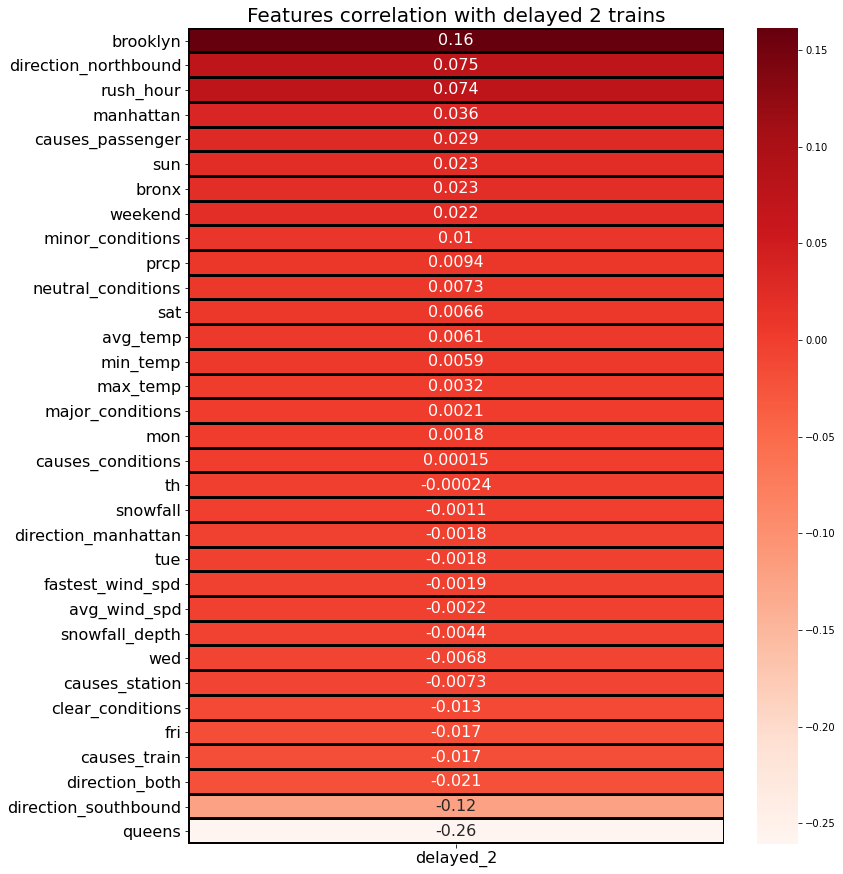

In [7]:
corr = features_df.corr().drop(['delayed_2'])
x=corr[['delayed_2']]
fig, ax = plt.subplots(figsize=(12,15))
sns.heatmap(x.sort_values(by=['delayed_2'],ascending=0),
           annot=True,
           cmap='Reds',
           annot_kws={'fontsize':16},
           linewidth=2,
           linecolor='black');
ax.set_title('Features correlation with delayed 2 trains',size=20)
ax.tick_params(labelsize=16)

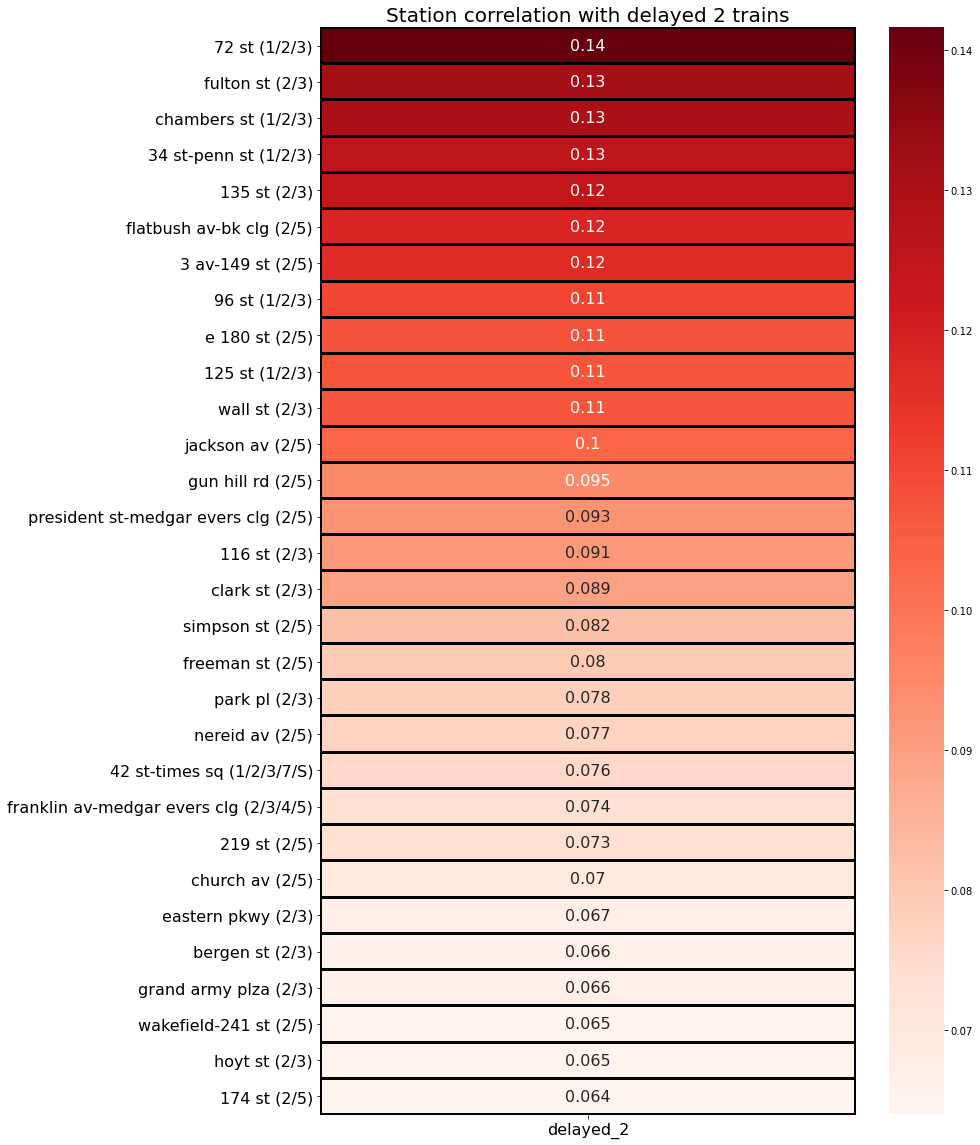

In [8]:
corr = stations_df.corr().drop(['delayed_2'])
x=corr[['delayed_2']]
fig, ax = plt.subplots(figsize=(12,20))
sns.heatmap(x.sort_values(by=['delayed_2'],ascending=0)[:30],
           annot=True,
           cmap='Reds',
           annot_kws={'fontsize':16},
           linewidth=2,
           linecolor='black',
);
ax.set_title('Station correlation with delayed 2 trains',size=20)
ax.tick_params(labelsize=16)


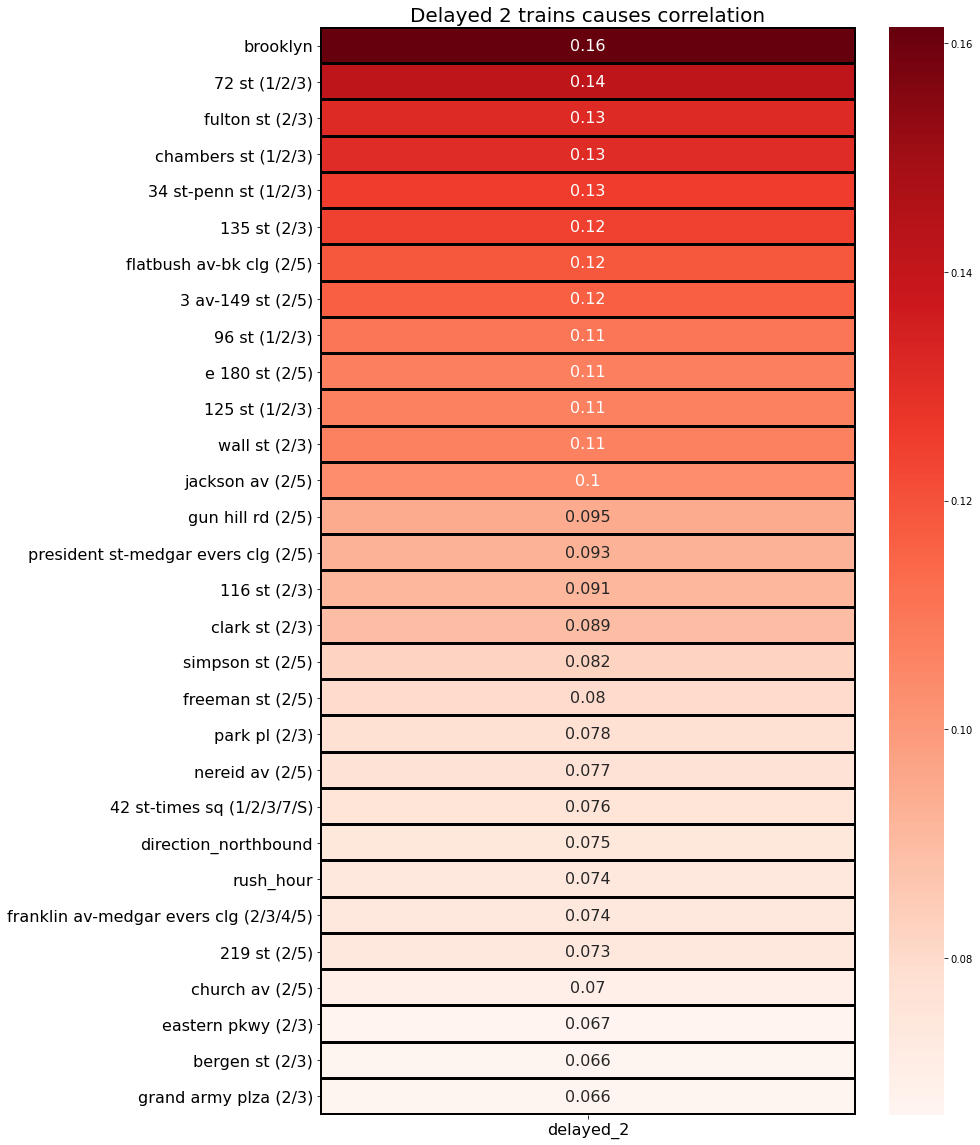

In [9]:
corr = df.corr().drop(['delayed_2'])
x=corr[['delayed_2']]
fig, ax = plt.subplots(figsize=(12,20))
sns.heatmap(x.sort_values(by=['delayed_2'],ascending=0)[:30],
           annot=True,
           cmap='Reds',
           annot_kws={'fontsize':16},
           linewidth=2,
           linecolor='black',
);
ax.set_title('Delayed 2 trains causes correlation',size=20)
ax.tick_params(labelsize=16)
